In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read data

In [93]:
data = pd.read_csv('MODELLING DATA/model_data.csv')

## Train and test datasets

In [94]:
from sklearn.model_selection import train_test_split

# Remove total emissions specific emissions would be linearly dependent.
# Leave capacity as a feature as the size of a plant might impact on its specific emissions
X = data.drop('co2emitted', axis=1)
y = data['co2emitted'] / data['capacity_g']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, shuffle=True)

In [95]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4711 entries, 589 to 1289
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type_g             4711 non-null   object 
 1   Generation         4711 non-null   int64  
 2   cf                 4711 non-null   float64
 3   time_coverage      4711 non-null   float64
 4   capacity_p         4711 non-null   float64
 5   capacity_g         4711 non-null   float64
 6   lat                4696 non-null   float64
 7   lon                4696 non-null   float64
 8   country            4711 non-null   object 
 9   status_g           4711 non-null   object 
 10  year_commissioned  3869 non-null   float64
 11  water_type         4711 non-null   object 
 12  cooling_type       3191 non-null   object 
 13  water_withdrawal   3524 non-null   float64
 14  water_consumption  3524 non-null   float64
 15  min_load           4684 non-null   float64
 16  ramp_up            468

## Preprocessor

In [96]:
categorical = X_train.select_dtypes(include=['object']).columns
numeric = X_train.select_dtypes(include=['int64','float64']).columns
categorical

Index(['type_g', 'country', 'status_g', 'water_type', 'cooling_type',
       'best_source'],
      dtype='object')

In [97]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Create a list of categorical column names and numeric column names
categorical_columns = list(categorical)
numeric_columns = list(numeric)

# Create transformers for categorical and numeric columns
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])

numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
])

# Create a column transformer that applies transformers to the respective column types
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_columns),
        ('num', numeric_transformer, numeric_columns)
    ])

# Fit and transform the data
X_train_trans_np = preprocessor.fit_transform(X_train)
X_train_trans = pd.DataFrame(X_train_trans_np, columns=preprocessor.get_feature_names_out())

In [98]:
X_train_trans.to_csv('MODELLING DATA/training_features.csv', index=False)
X_train_trans

,cat__type_g_Biomass,cat__type_g_Fossil Brown coal/Lignite,cat__type_g_Fossil Gas,cat__type_g_Fossil Hard coal,cat__type_g_Fossil Oil,cat__type_g_Fossil Oil shale,cat__type_g_Hydro Pumped Storage,cat__type_g_Hydro Run-of-river and poundage,cat__type_g_Hydro Water Reservoir,cat__type_g_Nuclear,...,num__year_commissioned,num__water_withdrawal,num__water_consumption,num__min_load,num__ramp_up,num__ramp_down,num__minimum_up_time,num__minimum_down_time,num__eff,num__Renewable
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1985.000000,167.870000,1.020000,0.498,0.009,-0.012,1694.0,342.0,1.00,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1983.071078,42.976691,0.980236,0.078,0.015,-0.015,60.0,57.0,1.00,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1969.000000,2.400000,1.870000,0.479,0.009,-0.013,221.0,134.0,0.36,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1983.071078,42.976691,0.980236,0.200,0.015,-0.015,307.0,63.0,1.00,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1981.000000,2.220000,1.810000,0.540,0.010,-0.014,363.0,198.0,0.28,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4706,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2009.000000,43.070000,0.380000,0.308,0.012,-0.014,152.0,76.0,0.54,0.0
4707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1988.000000,4.170000,2.540000,0.498,0.009,-0.012,1694.0,342.0,1.00,0.0
4708,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2010.000000,0.010000,0.010000,0.308,0.012,-0.014,152.0,76.0,0.53,0.0
4709,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1959.000000,2.220000,1.810000,0.485,0.009,-0.012,151.0,83.0,0.27,0.0


# Modelling

Try several regression models and evaluate them

In [99]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

LR = LinearRegression()
ridge = Ridge()
lasso = Lasso()
tree = DecisionTreeRegressor()
forest = RandomForestRegressor()
boost = GradientBoostingRegressor()

In [100]:
LR.fit(X_train_trans,y_train)
ridge.fit(X_train_trans,y_train)
lasso.fit(X_train_trans,y_train)
tree.fit(X_train_trans,y_train)
forest.fit(X_train_trans,y_train)
boost.fit(X_train_trans,y_train)

c:\Users\danip\Documents\Python venvs\ml_venv\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.78354e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\danip\Documents\Python venvs\ml_venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.425e+15, tolerance: 2.209e+12
  model = cd_fast.enet_coordinate_descent(


GradientBoostingRegressor()

In [101]:
# Fit and transform the data
X_test_trans_np = preprocessor.transform(X_test)
X_test_trans = pd.DataFrame(X_test_trans_np, columns=preprocessor.get_feature_names_out())

In [102]:
models = dict( zip(['linear','ridge','lasso','Tree','Random forest','Boosting'],
                   [LR,ridge,lasso,tree,forest,boost]) )

print('R^2 coefficient with default parameters:\n')
for model_name in models:
    print(model_name,':',models[model_name].score(X_test_trans,y_test))

R^2 coefficient with default parameters:

linear : 0.8576846465370673
ridge : 0.8577972630259647
lasso : 0.8577244205967526
Tree : 0.9838482330716256
Random forest : 0.9943135130987732
Boosting : 0.9901964219649739


In [103]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score

metrics = dict( zip(['MAE', 'MSE', 'r2', 'exp_variance'],
                    [mean_absolute_error,mean_squared_error,r2_score,explained_variance_score]) )

In [104]:
#Create array of metrics
results = np.zeros([len(models),len(metrics)])

for i,model_name in enumerate(models):
    for j,metric_name in enumerate(metrics):
        metric = metrics[metric_name]
        model = models[model_name]
        results[i,j] = metric(y_test,model.predict(X_test_trans))

scoring = pd.DataFrame(results,columns=metrics.keys(),index=models.keys())
scoring

,MAE,MSE,r2,exp_variance
linear,581872.681566,7.292486e+11,0.857685,0.857730
ridge,580769.507634,7.286715e+11,0.857797,0.857840
lasso,581734.861743,7.290448e+11,0.857724,0.857770
Tree,91015.190109,8.276446e+10,0.983848,0.983859
Random forest,57779.780333,2.913855e+10,0.994314,0.994323
Boosting,123556.400403,5.023524e+10,0.990196,0.990211


In [105]:
scoring.index

Index(['linear', 'ridge', 'lasso', 'Tree', 'Random forest', 'Boosting'], dtype='object')

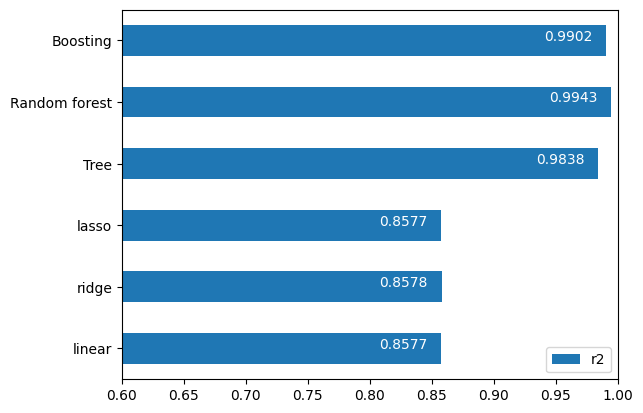

In [106]:
scoring.plot.barh(y='r2')
plt.xlim([0.6,1])
for i,model in enumerate(scoring.index):
    score = scoring['r2'].loc[model]
    plt.text(score-0.05,i,str(round(score,4)), color='white')

## Use the Decision Tree

Choose the decision tree for further analysis as it performs relatively close to the random forest and gradient boosting models while being simpler.

Text(0.5, 1.0, 'Top 8 feature importances of decision tree model')

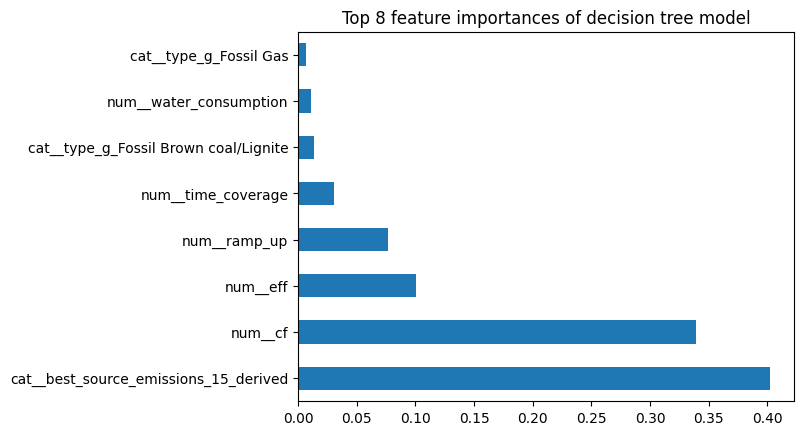

In [107]:
num_features = 8

importances = pd.Series(tree.feature_importances_, index=X_train_trans.columns)
importances.sort_values(ascending=False).head(num_features).plot(kind='barh')
plt.title('Top {} feature importances of decision tree model'.format(num_features))

Besides from the source of the emission estimation, the most important features for predicting specific emissions are the capacity factor of the plant, the efficiency and time related features such as ramp-up and time coverage.

## Save model data

Save the decision tree model along with the other variables relevant for modelling.

In [108]:
from joblib import dump, load
dump(tree, 'MODELLING DATA/tree_model.joblib')

import pickle
with open('MODELLING DATA/train_test_data.pickle','wb') as file:
    pickle.dump((X_train_trans, X_test_trans, y_train, y_test), file)
with open('MODELLING DATA/preproc_data.pickle','wb') as file:
    pickle.dump((X_train,X_test,categorical,numeric,preprocessor), file)
